## Stock Market Portfolio Optimization

### Gettting started with extracting and setting data for the analysis

In [1]:
import quandl # For realtime and hisstoric stock data
import pandas as pd
import numpy as np
import datetime
import requests # To request web page
import pickle # To save files
import bs4 as bs # Web scrapping
import os # To interact with os
import matplotlib.pyplot as plt # Data visualization
from matplotlib import style
style.use('ggplot')
from collections import defaultdict

In [122]:
resp = requests.get('https://en.wikipedia.org/wiki/List_of_BSE_SENSEX_companies') # Get SENSEX BSE copanies tickers

In [123]:
soup = bs.BeautifulSoup(resp.text, 'lxml') # Create beautiful soup object

In [124]:
table = soup.find('table', {'class': 'wikitable sortable'}) # Find required table

In [125]:
tickers = [] # Create a ticker list. With last element as SENSEX
for row in table.findAll('tr')[1:]:
    ticker = 'BOM'+row.findAll('td')[1].text
    tickers.append(ticker[:-1])
tickers.append('SENSEX')

In [126]:
with open("BSE31.pickle", "wb") as f: # Save list for further use
        pickle.dump(tickers, f)

In [127]:
with open("BSE31.pickle", "rb") as f: # Read newly created file
    tickers = pickle.load(f)

In [128]:
quandl.ApiConfig.api_key = 'UyZqeLfZV1q12ZPYcuDy' # Get data from Quandl

if not os.path.exists('stock_dfs'): # If such path doesn't exists in the pc then craete one folder
    os.makedirs('stock_dfs')
    
for ticker in tickers:
    if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
        df = quandl.get('BSE/'+ticker, column_index = 4, start_date='2016-12-30', end_date='2018-12-31')
        df.reset_index(inplace=True)
        df.set_index("Date", inplace=True)
        df.rename(columns={'Close':ticker}, inplace=True)
        df.to_csv('stock_dfs/{}.csv'.format(ticker)) # Save csv file for each comapny. With last one for SENSEX BSE  
    else:
        print('Already have {}'.format(ticker))

In [129]:
with open("BSE31.pickle","rb") as f: # Read all files and create main data frame
    tickers = pickle.load(f)

main_df = pd.DataFrame()

In [130]:
for count,ticker in enumerate(tickers):
    df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
    df.set_index('Date', inplace=True)
    #df.rename(columns={'Close':ticker}, inplace=True)
    if main_df.empty:
        main_df = df
    else:
        main_df = main_df.join(df, how='outer')
    
    if count % 10 == 0:
        print(count)
        
main_df.to_csv('BSE31_joined_closes.csv') # Create new csv file for main data frame

0
10
20
30


### Data Preprocessing

In [72]:
from datetime import datetime
df = pd.read_csv('BSE31_joined_closes.csv', header=None)
df = df.drop(df.index[0]) # Drop the row of columns

In [73]:
for i in range(len(df[0])):
    df[0].iloc[i] = datetime.strptime(df[0].iloc[i], '%Y-%m-%d')

In [74]:
df.set_index(0, inplace=True)
df = df.astype(float) # Make each data entry float type

In [75]:
df = df.pct_change()
df = df.iloc[1:]

In [76]:
df = df.groupby([df.index.year, df.index.month]).tail(1)

In [77]:
df.rename(columns={32:'BSE_Index'}, inplace=True)

In [78]:
df_train = df.iloc[:12]
df_test = df.iloc[12:24]

In [79]:
x_bar = df_train.mean(axis = 1)

In [80]:
df_train['x_bar'] = x_bar

c:\users\pushk\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [85]:
df_train.head()

,1,2,3,4,5,6,7,8,9,10,...,24,25,26,27,28,29,30,31,BSE_Index,x_bar
0,,,,,,,,,,,,,,,,,,,,,
2017-01-31,0.006749,-0.006342,0.011807,-0.009657,0.008137,-0.007991,0.009052,-0.029321,0.001912,0.009351,...,-0.003989,-0.013207,-0.037266,-0.009296,-0.005218,0.008392,-0.021543,0.011808,-0.006952,-0.007418
2017-02-28,0.023061,-0.005110,-0.015365,0.017234,0.026764,-0.024652,-0.003140,-0.000280,-0.010330,-0.001650,...,0.004112,0.006272,-0.008804,-0.002318,-0.002865,0.003940,0.013890,0.022000,-0.002414,-0.000196
2017-03-31,0.001111,-0.017245,-0.005375,-0.005966,-0.002709,0.008420,-0.015367,0.001123,-0.003080,-0.011048,...,0.008252,0.000087,-0.005890,-0.005944,0.000885,0.008698,0.002574,-0.002550,-0.000908,0.000713
2017-04-28,0.013959,0.005801,0.001296,-0.009190,-0.010772,0.006597,-0.017429,-0.001721,0.002696,-0.013724,...,0.025187,0.007378,-0.014145,0.002644,0.008336,0.005541,0.040057,-0.007206,-0.003708,0.001414
2017-05-31,-0.003876,0.004044,0.000408,0.003903,0.006761,-0.013011,0.003979,-0.000399,0.002099,-0.002380,...,0.000351,-0.012358,-0.001664,-0.009688,0.005052,-0.010141,-0.022875,-0.003960,-0.000436,-0.001216


In [86]:
for i in df_train.columns[:-2]: # Except BSE_Index and x_bar column itself
    df_train[i] = df_train[i] - df_train['x_bar']

c:\users\pushk\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [87]:
df_train.head()

,1,2,3,4,5,6,7,8,9,10,...,24,25,26,27,28,29,30,31,BSE_Index,x_bar
0,,,,,,,,,,,,,,,,,,,,,
2017-01-31,0.014167,0.001076,0.019225,-0.002239,0.015555,-0.000573,0.016470,-0.021904,0.009330,0.016769,...,0.003429,-0.005789,-0.029848,-0.001878,0.002200,0.015810,-0.014125,0.019226,-0.006952,-0.007418
2017-02-28,0.023257,-0.004913,-0.015169,0.017431,0.026960,-0.024456,-0.002943,-0.000083,-0.010133,-0.001454,...,0.004308,0.006468,-0.008607,-0.002122,-0.002668,0.004136,0.014086,0.022196,-0.002414,-0.000196
2017-03-31,0.000397,-0.017958,-0.006088,-0.006679,-0.003423,0.007707,-0.016080,0.000410,-0.003794,-0.011761,...,0.007539,-0.000626,-0.006603,-0.006657,0.000171,0.007985,0.001861,-0.003263,-0.000908,0.000713
2017-04-28,0.012545,0.004387,-0.000118,-0.010604,-0.012186,0.005183,-0.018842,-0.003135,0.001283,-0.015138,...,0.023773,0.005965,-0.015558,0.001230,0.006922,0.004128,0.038644,-0.008619,-0.003708,0.001414
2017-05-31,-0.002660,0.005261,0.001625,0.005119,0.007977,-0.011794,0.005195,0.000817,0.003315,-0.001163,...,0.001567,-0.011142,-0.000448,-0.008472,0.006269,-0.008924,-0.021659,-0.002743,-0.000436,-0.001216


In [88]:
from gurobipy import *

In [90]:
m = Model()

Academic license - for non-commercial use only


In [128]:
y = defaultdict()
p = dict()

In [129]:
for i in df_train.columns[:-2]:
    for t in range(len(df_train.index)):
        p[i,t] = df_train.iloc[t][i]
        y[i,t] = m.addVar(vtype = GRB.CONTINUOUS, name = 'y{}{}'.format(i,t+1))
        
v = m.addVar(vtype=GRB.CONTINUOUS, name='v')

In [130]:
for t in range(len(df_train.index)):
    m.addConstr(quicksum(y[i,t] for i in df_train.columns[:-2]) == 1)
    m.addConstr(quicksum(y[i,t]*p[i,t] for i in df_train.columns[:-2]) >= v)

In [131]:
m.setObjective(v,GRB.MAXIMIZE)
m.optimize()

Optimize a model with 83 rows, 2256 columns and 2608 nonzeros
Model has 13 quadratic constraints
Coefficient statistics:
  Matrix range     [3e-05, 1e+00]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 23 rows and 765 columns


GurobiError: Q matrix is not positive semi-definite (PSD)

Old Method

In [100]:
EOD_R = df_train.pct_change() # Create new data frame for percentage change of closing values

In [101]:
df2018Q = pd.DataFrame(columns=range(1,33))
for i in [1,5,9]:
    df2018Q.loc[i] = df.iloc[months[i]]
df2018Q

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
1,1142.85,559.7,3294.15,1722.10,516.30,270.35,1872.70,891.70,3747.45,1339.45,...,911.40,302.9,571.50,2633.75,438.85,252.95,729.10,327.50,311.65,33812.26
5,1206.50,532.4,2971.90,1876.20,404.40,277.45,1967.55,926.10,3657.10,1454.85,...,962.60,241.8,534.50,3482.65,333.45,187.30,585.65,286.35,354.00,35103.14
9,1312.05,640.5,2731.95,2750.95,377.75,279.95,2052.00,1076.45,3185.75,1651.40,...,1242.35,296.6,654.15,2093.20,262.05,142.65,593.05,224.45,334.10,38157.92


In [102]:
k = defaultdict(lambda: defaultdict(int)) # Create parameter dictionary for the LP Model
for t in range(1,13):
    for j in range(1,32):
        k[j][t] = (EOD_R[j].iloc[t] - EOD_R[32].iloc[t]).round(6)

### Optimization

In [103]:
from gurobipy import * # Import gurobi

In [104]:
ROI = 0 # Initialize return on investment

xList = list() # Create list to save results of the decision variables

for s in [1,5,9]: # Trimester
    #for t in range(1,13):
    x = dict()
    #n_inf = float("-inf")
    m = Model()

    for i in range(1,32):
        x[i] = m.addVar(vtype=GRB.CONTINUOUS, name='x%d'%i)

    v = m.addVar(vtype = GRB.CONTINUOUS)

    m.update()

    for t in range(s,s+4):
        #for t in range(1,13):
        m.addConstr(quicksum(x[i]*k[i][t] for i in range(1,32)) >= v)

    m.addConstr(quicksum(x[i] for i in range(1,32)) <= 1)
    #m.update()

    m.setObjective(v,GRB.MAXIMIZE)
    m.optimize()
    
    m.write("gurobipro.lp")
    ROI += m.objVal

    xList+= m.x
    
print('Length',len(xList),'List:',xList)
print('\nROI',ROI*100)

Optimize a model with 5 rows, 32 columns and 159 nonzeros
Coefficient statistics:
  Matrix range     [2e-04, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 0 rows and 1 columns
Presolve time: 0.01s
Presolved: 5 rows, 31 columns, 154 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.0000000e+30   4.000000e+30   1.000000e+00      0s
       9    2.7766419e-02   0.000000e+00   0.000000e+00      0s

Solved in 9 iterations and 0.01 seconds
Optimal objective  2.776641884e-02
Optimize a model with 5 rows, 32 columns and 159 nonzeros
Coefficient statistics:
  Matrix range     [1e-03, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 0 rows and 9 columns
Presolve time: 0.01s
Presolved: 5 rows, 23 columns, 114 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.0000000e+3

The optimal ROI value obtained was 9.2053970496915% profit

### Post Processing and Data Visualzation

In [113]:
#chunks = [xList[x:x+32] for x in [0,32,64]] # Divide list into three parts
X = defaultdict(lambda:defaultdict(int))

In [106]:
for i in range(1,32):
    for t in range(1,4):
        X[i][t] = chunks[t-1][1:32][i-1]
#X

In [107]:
StkPort = pd.DataFrame(X) # Create new data frame for trimester investment

In [108]:
d_portList = list() # d_porstList is the list of expected outcome
for t in range(1,4):
    d_port = 0
    for i in range(1,32):
        d_port += X[i][t]*df[i][t]
    d_portList.append(d_port)

In [109]:
#print(d_portList)
non_zero_count = list()

In [110]:
for i in range(1,32):
    non_zero_count.append(np.count_nonzero(StkPort[i]!=0)) # Count the number of non-zero investments for each company

In [111]:
np.argmax(non_zero_count)

30

In [112]:
#print(non_zero_count)

Text(0, 0.5, 'List of companies')

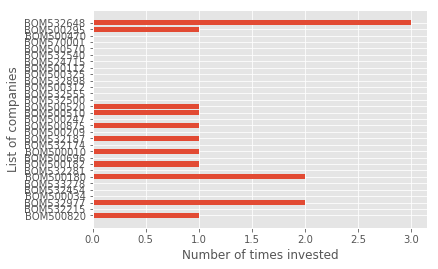

In [113]:
width = 0.8
plt.barh(tickers[:-1], non_zero_count, width)
#plt.ylim([0,36])
plt.xlabel('Number of times invested')
plt.ylabel('List of companies')
#plt.axes([1,2,3,4])

Above graph shows that BOM532648 has been invested three times over the investment period

In [114]:
T1 = chunks[0][1:]
T2 = chunks[1][1:]
T3 = chunks[2][1:]

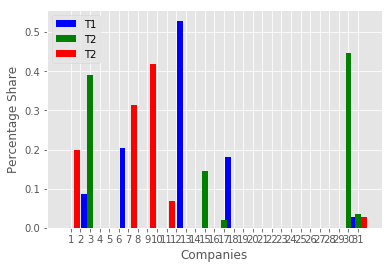

In [115]:
x = np.arange(1,32)
ax = plt.subplot(111)
w = 0.6
ax.bar(x-w, T1, width=w, color='b', align='center', label = 'T1')
ax.bar(x, T2, width=w, color='g', align='center', label = 'T2')
ax.bar(x+w, T3, width=w, color='r', align='center', label = 'T2')
plt.xlabel('Companies')
plt.ylabel('Percentage Share')
plt.xticks(list(range(1,32)))
#plt.set_xticklabels(tickers[:-1:])
plt.legend()

Above graph shows companies in which model has invested for each trimester

In [116]:
s_portList = list()

In [117]:
s_port = d_portList[0]
s_portList.append(s_port)

In [118]:
for i in range(1,4):
    s_port += d_portList[i-1]
    s_portList.append(s_port)

In [119]:
#print(s_portList)

In [120]:
Q_pct_change = df2018Q.pct_change()
Q_pct_change

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.055694,-0.048776,-0.097825,0.089484,-0.216734,0.026262,0.050649,0.038578,-0.024110,0.086155,...,0.056177,-0.201717,-0.064742,0.322316,-0.240173,-0.259537,-0.196749,-0.125649,0.135890,0.038178
9,0.087484,0.203043,-0.080740,0.466235,-0.065900,0.009011,0.042921,0.162347,-0.128886,0.135100,...,0.290619,0.226634,0.223854,-0.398963,-0.214125,-0.238388,0.012636,-0.216169,-0.056215,0.087023


In [121]:
BSE_TRENDList = list()
BSE_TREND = 1174.7250679791641
BSE_TRENDList.append(BSE_TREND)
for i in [1,2]:
    BSE_TREND *= 1+Q_pct_change[32].iloc[i]
    BSE_TRENDList.append(BSE_TREND)
BSE_TRENDList

[1174.7250679791641, 1219.573566593363, 1325.704497893471]

In [122]:
comp = dict()
for j in range(1,32):
    perform = [1174.7250679791641]
    p = 1174.7250679791641
    for i in [1,2]:
        p *= 1+Q_pct_change[j].iloc[i]
        perform.append(p)
    comp[j] = perform
print(comp)

{1: [1174.7250679791641, 1240.150321141761, 1348.6442012880625], 2: [1174.7250679791641, 1117.4265252672983, 1344.311963624539], 3: [1174.7250679791641, 1059.8076679954702, 974.2392269525302], 4: [1174.7250679791641, 1279.8438955592055, 1876.55184121554], 5: [1174.7250679791641, 920.1216685856556, 859.4855596148157], 6: [1174.7250679791641, 1205.5759944916554, 1216.4389967847862], 7: [1174.7250679791641, 1234.2234781344605, 1287.198077371306], 8: [1174.7250679791641, 1220.0436082264257, 1418.1146118943268], 9: [1174.7250679791641, 1146.4027661760933, 998.6471828348937], 10: [1174.7250679791641, 1275.933230168716, 1448.3116034646994], 11: [1174.7250679791641, 1327.1518658189448, 1349.3412321334067], 12: [1174.7250679791641, 1070.4527862781842, 1247.0888918918663], 13: [1174.7250679791641, 1342.0375362138382, 1323.4909383894478], 14: [1174.7250679791641, 1348.566121021054, 839.4235029226538], 15: [1174.7250679791641, 1279.6152541600973, 1393.959062271501], 16: [1174.7250679791641, 1445.1

Text(0, 0.5, 'Cumulative Stock Performance')

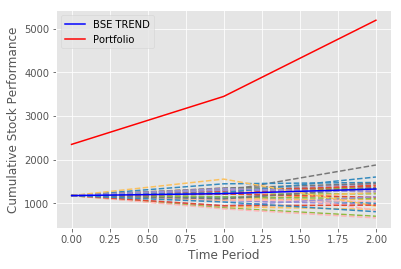

In [123]:
for i in comp.keys():
    plt.plot(range(3),comp[i], linestyle = '--')
plt.plot(range(3), BSE_TRENDList, color = 'b', label = 'BSE TREND')
plt.plot(range(3), s_portList[1:], color = 'r', label = 'Portfolio')
plt.legend()
plt.xlabel('Time Period')
plt.ylabel('Cumulative Stock Performance')

From above graph it is clear that our portfolio outperforms BSE Trend in long run

In [1]:
pwd

'C:\\Users\\pushk\\Documents\\School\\IE 555\\Project'